**Linear Regression implementation on self created(randomly generated dataset)**

In [1]:
import numpy as np
from statistics import mean
def calculate_slope(X_values, y_values):
  m = (((mean(X_values)* mean(y_values)) - mean(X_values*y_values))/((mean(X_values))**2 - mean(X_values**2)))
  return m

In [2]:
def y_intercept(y_values, X_values):
  c = (mean(y_values) - ((calculate_slope(X_values, y_values))*(mean(X_values))))
  return c

In [3]:
def squared_error(original_ys, ys_line):
  return sum((ys_line-original_ys)**2)

def coefficient_of_determination(original_ys, ys_line):
  y_mean_line = [mean(original_ys) for y in original_ys]
  squared_error_regression = squared_error(original_ys, ys_line)
  squared_error_y_mean = squared_error(original_ys, y_mean_line)
  return (1 - (squared_error_regression/squared_error_y_mean))

In [13]:
import random
import numpy as np

def dataset(num_of_points, variance, step, correlation = False):
  y_values = []
  val = 1
  for i in range(num_of_points):
    y = val + random.randrange(-variance, variance)
    y_values.append(y)
    if(correlation and correlation == 'pos'):
      val+=step
    elif(correlation and correlation == 'neg'):
      val-=step
  
  X_values = [x for x in range(num_of_points)]
  return np.array(X_values, dtype = np.float64), np.array(y_values, dtype = np.float64)

X_values, y_values = dataset(40, 30, 2, correlation = 'pos')


In [14]:
m = calculate_slope(X_values, y_values)
c = y_intercept(y_values, X_values)
regression_line = [(m*x) + c for x in X_values]

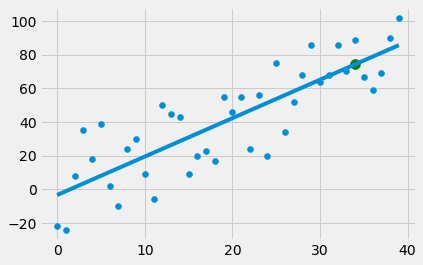

In [21]:
from matplotlib import style
import matplotlib.pyplot as plt

#prediction on our on value

predict_X = 34
predict_y = m*predict_X + c

style.use('fivethirtyeight')
plt.scatter(X_values, y_values)
plt.plot(X_values, regression_line)
plt.scatter(predict_X, predict_y, s= 100, color = 'g')
plt.show()

In [16]:
r_squared = coefficient_of_determination(y_values, regression_line)
print(r_squared)

0.6965873402211055
